step 0: v = [1.2 1.5 1. ], pi = [1, 1, 1], q[2,0]=1.000, q[2,1]=-1.000
step 1: v = [2.53  2.545 2.14 ], pi = [1, 1, 1], q[2,0]=2.140, q[2,1]=-0.050
step 2: v = [3.5408  3.71825 3.4035 ], pi = [1, 1, 1], q[2,0]=3.403, q[2,1]=1.033
step 3: v = [4.672535  4.7985425 4.36376  ], pi = [1, 1, 1], q[2,0]=4.364, q[2,1]=2.233
step 4: v = [5.6760067  5.79224012 5.43890825], pi = [1, 1, 1], q[2,0]=5.439, q[2,1]=3.146
step 5: v = [6.63549506 6.7795846  6.39220636], pi = [1, 1, 1], q[2,0]=6.392, q[2,1]=4.167
step 6: v = [7.56700351 7.68815818 7.30372031], pi = [1, 1, 1], q[2,0]=7.304, q[2,1]=5.073
step 7: v = [8.43070707 8.56359381 8.18865333], pi = [1, 1, 1], q[2,0]=8.189, q[2,1]=5.939
step 8: v = [9.26417543 9.39419619 9.00917172], pi = [1, 1, 1], q[2,0]=9.009, q[2,1]=6.779
step 9: v = [10.05133173 10.1798399   9.80096666], pi = [1, 1, 1], q[2,0]=9.801, q[2,1]=7.559
step 10: v = [10.79886199 10.92984174 10.54876515], pi = [1, 1, 1], q[2,0]=10.549, q[2,1]=8.311
step 11: v = [11.5109451  11.64012289

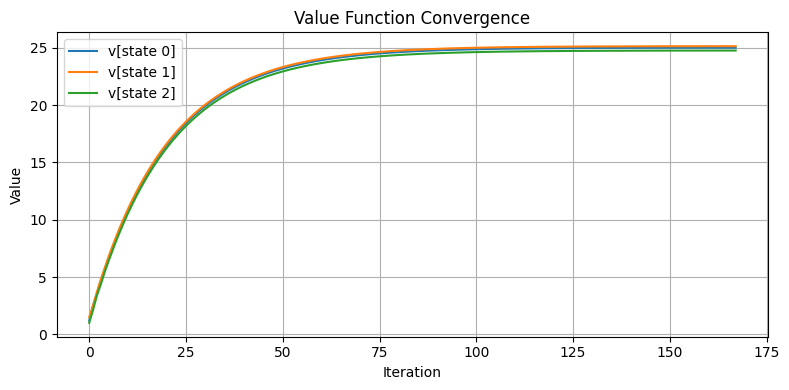

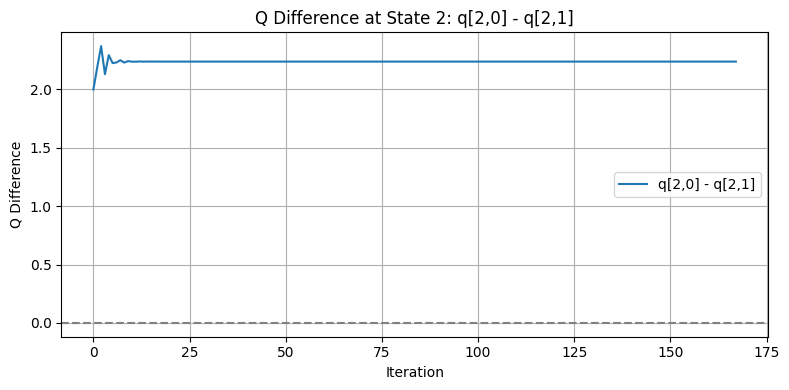

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt

# MDP の設定
p = [0.8, 0.5, 1.0]
gamma = 0.95

r = np.zeros((3, 3, 2))
r[0, 1, 0] = 1.0
r[0, 2, 0] = 2.0
r[0, 0, 1] = 0.0
r[1, 0, 0] = 1.0
r[1, 2, 0] = 2.0
r[1, 1, 1] = 1.0
r[2, 0, 0] = 1.0
r[2, 1, 0] = 0.0
r[2, 2, 1] = -1.0  

# 初期化
v = [0, 0, 0]
v_new = copy.copy(v)
q = np.zeros((3, 2))
pi = [0.5, 0.5, 0.5]

# 追跡用
v_history = []
q_diff_history = []

# 価値反復法
for step in range(1000):
    for i in range(3):
        # q関数の計算（行動0と1）
        q[i, 0] = p[i] * (r[i, (i + 1) % 3, 0] + gamma * v[(i + 1) % 3]) + \
                  (1 - p[i]) * (r[i, (i + 2) % 3, 0] + gamma * v[(i + 2) % 3])
        q[i, 1] = r[i, i, 1] + gamma * v[i]

        # greedy方策選択
        if q[i, 0] > q[i, 1]:
            pi[i] = 1
        elif q[i, 0] == q[i, 1]:
            pi[i] = 0.5
        else:
            pi[i] = 0

    # 価値関数更新
    v_new = np.max(q, axis=-1)

    # ログ保存
    v_history.append(copy.copy(v_new))
    q_diff_history.append(q[:, 0] - q[:, 1])  # 行動0と1の差

    # 収束判定（精密）
    if np.allclose(v_new, v, atol=1e-6):
        break

    # 更新
    v = copy.copy(v_new)

    # 状態2に注目してログ出力
    print(f"step {step}: v = {v}, pi = {pi}, q[2,0]={q[2,0]:.3f}, q[2,1]={q[2,1]:.3f}")

# グラフ描画：価値関数の収束
v_array = np.array(v_history)
plt.figure(figsize=(8, 4))
for i in range(3):
    plt.plot(v_array[:, i], label=f"v[state {i}]")
plt.title("Value Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# グラフ描画：状態2の q差分
q_diff_array = np.array(q_diff_history)
plt.figure(figsize=(8, 4))
plt.plot(q_diff_array[:, 2], label="q[2,0] - q[2,1]")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Q Difference at State 2: q[2,0] - q[2,1]")
plt.xlabel("Iteration")
plt.ylabel("Q Difference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
